In [1]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import asarray
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from numpy import asarray
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
# importing the dataset
dataset = pd.read_csv('test74.csv')

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.shape

(8792, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8792 entries, 0 to 8791
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   MSSubClass         8792 non-null   object
 1   DemandFoc          8792 non-null   int64 
 2   StockOut           8792 non-null   object
 3   Local              8792 non-null   object
 4   TechSavvy          8792 non-null   object
 5   EquipBreak         8792 non-null   object
 6   Week               8792 non-null   object
 7   SuppplyConstraint  8792 non-null   object
 8   Warehouse          8784 non-null   object
 9   Product            8792 non-null   object
 10  MOQ                8792 non-null   object
 11  Orders             8792 non-null   int64 
 12  ProdPlan           8792 non-null   int64 
 13  SaleType           8788 non-null   object
dtypes: int64(3), object(11)
memory usage: 961.8+ KB


In [7]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [8]:
dataset.fillna(999, inplace=True)

In [9]:
dataset.head()

,MSSubClass,DemandFoc,StockOut,Local,TechSavvy,EquipBreak,Week,SuppplyConstraint,Warehouse,Product,MOQ,Orders,ProdPlan,SaleType
0,20C,10525,Yes,Yes,A,No,One,No,MSN,RL,No,3,345,Credit
1,20C,12976,No,Yes,A,No,Two,No,BSN,RL,No,15,132,Credit
2,60C,19100,Yes,No,B,No,One,No,MSN,RHL,Yes,13,687,Credit
3,60C,6660,No,No,B,No,Two,No,MSN,RHL,No,1,476,Credit
4,120C,18423,Yes,No,B,Yes,Three,No,IA,RHL,No,15,858,Credit


In [10]:
# find categorical variables

categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 11 categorical variables

The categorical variables are :

 ['MSSubClass', 'StockOut', 'Local', 'TechSavvy', 'EquipBreak', 'Week', 'SuppplyConstraint', 'Warehouse', 'Product', 'MOQ', 'SaleType']


In [11]:
# view the categorical variables

dataset[categorical].head()

,MSSubClass,StockOut,Local,TechSavvy,EquipBreak,Week,SuppplyConstraint,Warehouse,Product,MOQ,SaleType
0,20C,Yes,Yes,A,No,One,No,MSN,RL,No,Credit
1,20C,No,Yes,A,No,Two,No,BSN,RL,No,Credit
2,60C,Yes,No,B,No,One,No,MSN,RHL,Yes,Credit
3,60C,No,No,B,No,Two,No,MSN,RHL,No,Credit
4,120C,Yes,No,B,Yes,Three,No,IA,RHL,No,Credit


In [12]:
Fq=pd.crosstab(index=dataset["StockOut"], columns ="count")
#Fq=pd.crosstab(index=dataset["MSSubClass"], columns ="count")
Fq

col_0,count
StockOut,
No,4383
Yes,4409


In [13]:
Fq=pd.crosstab(index=dataset["MSSubClass"], columns ="count")
Fq

col_0,count
MSSubClass,
120C,584
150C,8
160C,412
180C,44
190C,196
20C,3240
30C,416
40C,16
45C,30


In [14]:
Fq=pd.crosstab(index=dataset["Local"], columns ="count")
Fq

col_0,count
Local,
No,4405
Yes,4387


In [15]:
Fq=pd.crosstab(index=dataset["TechSavvy"], columns ="count")
Fq

col_0,count
TechSavvy,
A,3604
B,4016
C,136
D,1008
E,28


In [16]:
Fq=pd.crosstab(index=dataset["EquipBreak"], columns ="count")
Fq

col_0,count
EquipBreak,
No,4307
Yes,4485


In [17]:
Fq=pd.crosstab(index=dataset["Week"], columns ="count")
Fq

col_0,count
Week,
One,2556
Three,1576
Two,2312
four,2348


In [18]:
Fq=pd.crosstab(index=dataset["SuppplyConstraint"], columns ="count")
Fq

col_0,count
SuppplyConstraint,
No,4371
Yes,4421


In [19]:
Fq=pd.crosstab(index=dataset["Warehouse"], columns ="count")
Fq

col_0,count
Warehouse,
999,8
BRT,216
BSN,1256
CBlock,4
ENT,88
GLU,24
IA,1280
JNJ,384
KPL,696


In [20]:
Fq=pd.crosstab(index=dataset["Product"], columns ="count")
Fq

col_0,count
Product,
Fa,24
No,3630
Po,1
RH,5
RH&RHL,190
RHL,661
RL,602
Wood,1
Yes,3678


In [21]:
Fq=pd.crosstab(index=dataset["MOQ"], columns ="count")
Fq

col_0,count
MOQ,
No,4338
Yes,4454


In [22]:
Fq=pd.crosstab(index=dataset["SaleType"], columns ="count")
Fq

col_0,count
SaleType,
999,4
Advance,359
CCredit,24
COD,142
Cash,385
Con,6
ConLI,14
ConLw,6
Credit,7790


In [23]:
#declaring x and y variables

X = dataset.drop(['StockOut'], axis=1)
y = dataset['StockOut']

In [24]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 88)

In [25]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((6154, 13), (2638, 13))

In [26]:
# import category encoders

import category_encoders as ce
# encode remaining variables with one-hot encoding
from sklearn.model_selection import train_test_split
encoder = ce.OneHotEncoder(cols=[ 'MSSubClass','Local', 'TechSavvy', 'EquipBreak', 'Week', 'SuppplyConstraint', 'Warehouse', 'Product', 'MOQ', 'SaleType'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [27]:
cols = X_train.columns

In [28]:
X_train.head()

,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSSubClass_5,MSSubClass_6,MSSubClass_7,MSSubClass_8,MSSubClass_9,MSSubClass_10,...,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleType_9,SaleType_10,SaleType_11
3883,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4029,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8546,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5420,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7675,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
X_train.shape

(6154, 67)

In [30]:
X_train.shape

(6154, 67)

In [31]:
X_test.head()

,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSSubClass_5,MSSubClass_6,MSSubClass_7,MSSubClass_8,MSSubClass_9,MSSubClass_10,...,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleType_9,SaleType_10,SaleType_11
5984,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5674,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3091,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5640,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
617,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [32]:
X_test.shape

(2638, 67)

In [33]:
X_test.shape

(2638, 67)

In [34]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [35]:
X_train.shape

(6154, 67)

In [36]:
# print categorical variables

categorical

['MSSubClass',
 'StockOut',
 'Local',
 'TechSavvy',
 'EquipBreak',
 'Week',
 'SuppplyConstraint',
 'Warehouse',
 'Product',
 'MOQ',
 'SaleType']

In [37]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()

,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSSubClass_5,MSSubClass_6,MSSubClass_7,MSSubClass_8,MSSubClass_9,MSSubClass_10,...,SaleType_2,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleType_9,SaleType_10,SaleType_11
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [39]:
y_pred = gnb.predict(X_test)

y_pred

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype='<U3')

In [40]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.1f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score: 0.5


In [41]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype='<U3')

In [42]:
print('Training-set accuracy score: {0:0.1f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.5


In [43]:
# print the scores on training and test set

print('Training set score: {:.1f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.1f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.5
Test set score: 0.5


In [44]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[  29 1271]
 [  27 1311]]

True Positives(TP) =  29

True Negatives(TN) =  1311

False Positives(FP) =  1271

False Negatives(FN) =  27


<AxesSubplot:>

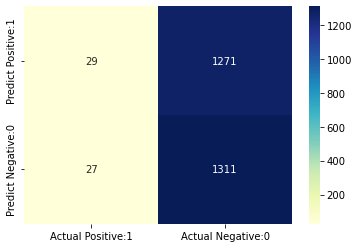

In [45]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.52      0.02      0.04      1300
         Yes       0.51      0.98      0.67      1338

    accuracy                           0.51      2638
   macro avg       0.51      0.50      0.36      2638
weighted avg       0.51      0.51      0.36      2638



In [47]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [48]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0223


In [49]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.5179
